# **Aula 08 - Deep Learning - Redes Multilayer Perceptron**

## **Objetivos**

  - Praticar os algoritmos de multilayer Perceptron (MLP)
  - Conhecer uma intuição sobre função de ativação, backpropagation
  - Conhecer e praticar o framework TensorFlow
  

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Artificial do tipo Multilayer Perceptron**, capaz de classificar a espécie da flor íris com base nas suas características de Pétala e Sépala. Para isso vamos usar o dataset da ultima aula (https://archive.ics.uci.edu/ml/datasets/Iris).

Esse dataset contém 150 exemplares de flor íris, separadas em três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo que foram utilizadas 50 amostras de cada espécie. Os atributos de largura e comprimento da sépala e da pétala de cada flor foram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

## **Roteiro**

### **1** - Carregando as Bibliotecas

Para trabalhar com redes neurais de multicamadas, usaremos duas bibliotecas: TensorFlow e Keras.

"O TensorFlow é uma biblioteca de software gratuita e de código aberto para aprendizado de máquina e inteligência artificial. Ele pode ser usado em uma variedade de tarefas, mas tem um foco particular no treinamento e inferência de redes neurais profundas. Foi desenvolvido pela equipe do Google Brain para uso interno do Google em pesquisa e produção. A versão inicial foi lançada sob a Licença Apache 2.0 em 2015. O Google lançou a versão atualizada do TensorFlow, chamada TensorFlow 2.0, em setembro de 2019. Pode ser usado em uma ampla variedade de linguagens de programação, incluindo Python, JavaScript, C++ e Java. Essa flexibilidade se presta a uma variedade de aplicações em muitos setores diferentes." (Wikipedia, 2023)

Para mais informações sobre o TensorFlow, acesse a página oficial: https://www.tensorflow.org/?hl=pt-br

" O Keras é uma biblioteca de código aberto que fornece uma interface Python para redes neurais artificiais. Atua como uma interface para a biblioteca TensorFlow. Até a versão 2.3, o Keras suportava vários back-ends, incluindo TensorFlow, Microsoft Cognitive Toolkit, Theano e PlaidML. A partir da versão 2.4, apenas o TensorFlow é compatível. Projetado para permitir a experiência rápida com redes neurais profundas, ele se concentra em ser amigável, modular e extensível. Foi desenvolvido como parte do esforço de pesquisa do projeto ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System),e seu principal autor e mantenedor é François Chollet, um engenheiro do Google. Chollet também é o autor do modelo de rede neural profunda Xception."

Para mais informações sobre o Keras, acesse a página oficial: https://keras.io/

**Importe as bibliotecas necessárias: TensorFlow, Keras, NumPy e Pandas.**

In [32]:
# Inicializção das bibliotecas
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **2** - Carregando o Dataset

A biblioteca sklearn é uma biblioteca de aprendizado de máquina em Python amplamente utilizada para tarefas de análise de dados e modelagem estatística. Seu nome completo é scikit-learn e ela oferece uma ampla gama de algoritmos e ferramentas para tarefas de aprendizado de máquina, como classificação, regressão, agrupamento, redução de dimensionalidade, seleção de recursos e pré-processamento de dados.

O sklearn possui algums datasets já pré carragados, de modo que neste primeiro passo, vamos carregar o dataset Iris do sklearn.

In [33]:
# Importando o dataset Iris
from sklearn.datasets import load_iris

# Carregar o dataset em um objeto
iris = load_iris()

# Acessando os dados e os rótulos
data = iris.data      # Dados de entrada (características)
target = iris.target  # Rótulos de classe
target_names = iris.target_names # Identificação dos rótulos de classes

# Imprimindo informações sobre o conjunto de dados
print("Shape dos dados:", data.shape)
print("Classes:", target)
print("Nomes das Classes:", target_names)

Shape dos dados: (150, 4)
Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Nomes das Classes: ['setosa' 'versicolor' 'virginica']


### **3** - Explorando o Dataset

Como já trabalhamos com esse dataset antes, sabemos exatamente qual a correlação dos atributos com a classificação de flor, por isso, vamos pular a etapa de exploração dos dados e preparar nosso Dataset para implementar o modelo, maaaaas, se quiser, pode revisar essa parte do roteiro no campo abaixo.

In [ ]:
# Explorando o dataset

## **4 - Analisando os dados**

Mesmo caso do item 2 :D

In [ ]:
# Analisando os dados

## **5 - Preparando para implementar o modelo**

vamos separar o dataset em treino e teste, considerando:

* Entradas: São os atributos utilizados pelo modelo para realizar o treinamento e teste;

* Classes: São as classificações das iris de acordo com os atributos. Utilizado para treinar e testar o modelo.

In [40]:
# Convertendo o Dataset para um Data Frame do Pandas
iris_df = pd.DataFrame(data, columns = iris.feature_names)
iris_df['target'] = target
iris_df['class'] = [target_names[i] for i in target]

# Selecionando um sub-dataframe com os 4 caracteristicas das flores
# e outro com a variável de classes
entradas = iris_df[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']]
classes = iris_df['target']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 4) e classes (150,)


Com os dois suconjuntos criados precisamos separa-los em dataset de Treino e dataset de Teste.

Se você não se lembra o que isso quer dizer, leia o roteiro da última aula, mas aqui vai uma breve revisão: Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória sempre que rodarmos a função.

Para eliminarmos essa aleatoriedade, vamos fixar a semente do algoritmo de geração de números randomicos da biblioteca, usando **random_state = 42**

In [41]:
from sklearn.model_selection import train_test_split

# Separamos 20% para o teste
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2, random_state=42)

#Primeiras linhas do dataframe
print(entradas_treino.head())

print()

print(classes_treino.head())

print()

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

    petal length (cm)  petal width (cm)  sepal length (cm)  sepal width (cm)
22                1.0               0.2                4.6               3.6
15                1.5               0.4                5.7               4.4
65                4.4               1.4                6.7               3.1
11                1.6               0.2                4.8               3.4
42                1.3               0.2                4.4               3.2

22    0
15    0
65    1
11    0
42    0
Name: target, dtype: int64

Formato das tabelas de dados de treino (120, 4) e teste (30, 4)


## **6 - Criando o Modelo**

In [36]:
model = keras.Sequential([
    keras.layers.Dense(4,input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

Este trecho de código define uma rede neural sequencial usando a API Keras do TensorFlow.

A rede neural é criada usando a classe Sequential do Keras, que é uma pilha linear de camadas de rede. Nesse caso, a rede tem três camadas:

* Uma camada densa (fully connected) tendo como entrada (input_shape) 4 dimensões (o número de características do conjunto de dados Iris);

* Uma camada densa (fully connected) com 10 neurônios, que recebe as informações da camada de entrada, com uma função de ativação ReLU e sem especificar uma entrada, pois ela herda a saída da camada anterior.

* Uma camada densa com 3 neurônios (uma para cada classe do conjunto de dados Iris), uma função de ativação softmax e sem especificar uma entrada, pois ela herda a saída da camada anterior.

A função de ativação ReLU é usada na camada de entrada para adicionar não linearidade aos dados de entrada. A função ReLU é definida como max(x, 0), o que significa que a saída da camada é 0 para todos os valores de entrada negativos e é igual à entrada para valores de entrada positivos.

A função de ativação softmax é usada na camada de saída para converter as saídas da rede em uma distribuição de probabilidade sobre as 3 classes do conjunto de dados Iris.

## **7 - Compilando o Modelo**

**Compile o modelo, definindo a função de perda, o otimizador e as métricas**

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

A função compile do Keras é usada para compilar o modelo da rede neural definido anteriormente, passando as configurações que serão usadas no modelo.

Os argumentos do compile são:

* optimizer: Otimizador usado para atualizar os pesos da rede durante o treinamento. Neste caso, usamos o otimizador 'adam', que é uma variação do otimizador estocástico de descida de gradiente (SGD) que adapta a taxa de aprendizado durante o treinamento.

* loss: Função de perda usada para medir o quão bem o modelo está aprendendo durante o treinamento. Neste caso, usamos a função de perda 'sparse_categorical_crossentropy', que é uma função de perda adequada para problemas de classificação multiclasse em que as classes são representadas como inteiros.

* metrics: Métricas usadas para avaliar o desempenho do modelo durante o treinamento. Neste caso, usamos a métrica 'accuracy', que é a proporção de exemplos classificados corretamente em relação ao número total de exemplos.

O objetivo do treinamento da rede neural é minimizar a função de perda durante o treinamento usando o otimizador especificado. O modelo é avaliado em relação à métrica de precisão durante o treinamento para monitorar o desempenho do modelo.

Uma vez compilado, o modelo pode ser treinado usando o método fit do Keras, passando os dados de treinamento e as etiquetas, juntamente com as configurações de treinamento definidas no compile.

In [38]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
 dense_16 (Dense)            (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


O método sumary() apresenta um resumo da nossa rede neural.

## **8 - Treinando o Modelo**

Para treinarmos o modelo, além dos parâmetros de treino, temos que passar em quantas epochs (epocas) o modelo será treinado. As epocas representam a quantidade de vezes em que a rede irá adequar seus pesos, com o objetivo de obtermos uma boa acuracia.
No nosso roteiro, vamos treinar 100 vezes! Note que temos uma rede relativamente pequena, então o treinamento deve ser rápido, mas para redes muito complexas, o treinamento pode levar horas ou dias, por isso sempre use uma GPU para agilizar o processo.

In [42]:
epochs_hist = model.fit(entradas_treino, classes_treino, epochs=100)

Epoch 1/100
4/4 [==============================] - 5s 6ms/step - loss: 1.2516 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2186 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1851 - accuracy: 0.3417
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1521 - accuracy: 0.3417
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1200 - accuracy: 0.3417
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0870 - accuracy: 0.3417
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0571 - accuracy: 0.3417
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0247 - accuracy: 0.3417
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9938 - accuracy: 0.3417
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9634 - accuracy: 0.3417
Epoch 11/100
4/4 [===========

Vamos plotar um gráfico da Loss e da Acuracy:

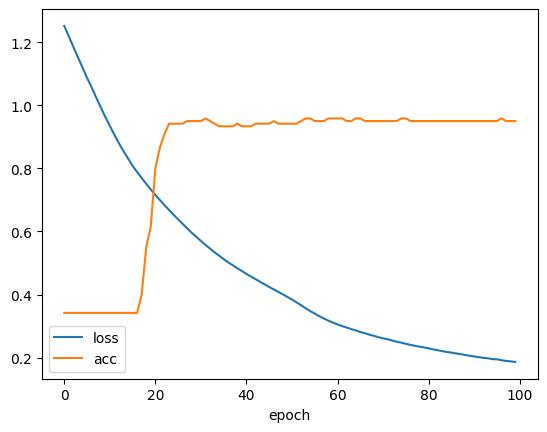

In [46]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

Interprete o gráfico

## **9 - Testando o Modelo**

Vamos usar os dados de teste para avaliar se o mesmo está prevendo os resultados corretamente

In [47]:
test_loss, test_acc = model.evaluate(entradas_teste, classes_teste)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 140ms/step - loss: 0.1582 - accuracy: 1.0000
Test accuracy: 1.0


Neste caso, como foi a acuracia do nosso modelo? Ele aprendeu bem a classificar as flores?

Agora vamos fazer algumas predições, usando o mesma entrada de testes

In [48]:
predictions = model.predict(entradas_teste)
print(predictions)

1/1 [==============================] - 0s 72ms/step
[[9.4907172e-03 8.0836397e-01 1.8214533e-01]
 [9.8403925e-01 1.5958905e-02 1.8763270e-06]
 [6.6669604e-06 4.5014802e-02 9.5497853e-01]
 [4.7554751e-03 6.9133449e-01 3.0390999e-01]
 [1.4677646e-02 8.8816500e-01 9.7157367e-02]
 [9.8104572e-01 1.8950088e-02 4.1929238e-06]
 [3.2551259e-02 8.9324540e-01 7.4203342e-02]
 [3.1295544e-04 2.9722685e-01 7.0246023e-01]
 [1.0198613e-02 7.3352247e-01 2.5627890e-01]
 [3.4894045e-02 8.9341450e-01 7.1691498e-02]
 [3.5226095e-04 3.0940080e-01 6.9024694e-01]
 [9.7625822e-01 2.3733873e-02 7.9366155e-06]
 [9.8642612e-01 1.3572701e-02 1.2288345e-06]
 [9.7683901e-01 2.3153735e-02 7.1773225e-06]
 [9.7112173e-01 2.8871432e-02 6.8277336e-06]
 [3.1542622e-03 7.0225024e-01 2.9459551e-01]
 [1.1512608e-05 5.2911643e-02 9.4707686e-01]
 [3.5438824e-02 8.7920219e-01 8.5359022e-02]
 [5.1283208e-03 6.7267883e-01 3.2219294e-01]
 [1.8129611e-05 5.9136946e-02 9.4084489e-01]
 [9.5908040e-01 4.0896267e-02 2.3372068e-05]
 [5

Ao usar o modelo treinado para fazer previsões com model.predict(test_features), os valores de saída serão probabilidades de cada uma das três classes (setosa, versicolor e virginica) para cada entrada do conjunto de teste. Para converter essas probabilidades em uma classe de flor, você pode usar a função argmax da biblioteca NumPy. A função argmax retorna o índice do valor máximo em um array. Como as classes foram codificadas anteriormente como 0, 1 e 2, o índice máximo corresponderá à classe prevista.

Aqui está um exemplo de como converter as probabilidades em classes de flor:

In [50]:
predicted_classes = np.argmax(predictions, axis=1)

# Decode class values
class_names = ['setosa', 'versicolor', 'virginica']
predicted_class_names = [class_names[i] for i in predicted_classes]

# Print example predictions
print("Example predictions:")
for i in range(10):
    print(f"Predicted class: {predicted_class_names[i]}, True class: {class_names[classes_teste.iloc[i]]}")


Example predictions:
Predicted class: versicolor, True class: versicolor
Predicted class: setosa, True class: setosa
Predicted class: virginica, True class: virginica
Predicted class: versicolor, True class: versicolor
Predicted class: versicolor, True class: versicolor
Predicted class: setosa, True class: setosa
Predicted class: versicolor, True class: versicolor
Predicted class: virginica, True class: virginica
Predicted class: versicolor, True class: versicolor
Predicted class: versicolor, True class: versicolor


Nesse exemplo, np.argmax(predictions, axis=1) retorna uma matriz com o índice da classe com a probabilidade mais alta para cada entrada do conjunto de teste. Em seguida, o código usa essa matriz de índices para decodificar as classes previstas de volta em seus valores de string originais (class_names). O exemplo de código imprime as previsões para as primeiras 10 entradas do conjunto de teste, juntamente com a verdadeira classe correspondente.

## **10 - Avaliando o Modelo**

In [54]:
from sklearn.metrics import classification_report

# Get classification report
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(classes_teste, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



O que as métricas indicam?

## **Exercicio**

Agora implemente esse mesmo roteiro com o dataset 'breast_cancer'